In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = '1'
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("TOFRevisionFinal.csv", encoding='latin-1')

In [3]:
df

,Server Region,Account,Rules Violation,Unnamed: 3,Spending Score
0,Asia-Pacific,P**ani,Illegal resource obtainment,NaN,3
1,Europe,V**ERA73,Illegal resource obtainment,NaN,1
2,Southeast Asia,r**okooo,Illegal resource obtainment,NaN,1
3,Southeast Asia,B**gBongUrMom,Illegal resource obtainment & Cheating on Bygo...,NaN,3
4,South America,N**ERLEND,Cheating on Bygone Phantasm,NaN,1
...,...,...,...,...,...
244,Europe,M**archys,Illegal resource obtainment,NaN,2
245,Europe,H**ang,Illegal resource obtainment,NaN,1
246,Southeast Asia,H**terfang,Illegal resource obtainment,NaN,3
247,Asia-Pacific,t**perry7w7,Illegal resource obtainment,NaN,3


In [4]:
df['Server Region'].value_counts()

Southeast Asia    95
Europe            80
North America     35
Asia-Pacific      31
South America      8
Name: Server Region, dtype: int64

In [5]:
df['Rules Violation'].value_counts()

Illegal resource obtainment                                  228
Cheating on Bygone Phantasm                                   15
Illegal resource obtainment & Cheating on Bygone Phantasm      6
Name: Rules Violation, dtype: int64

In [6]:
df.drop('Account', axis=1, inplace = True)

In [7]:
df.drop('Unnamed: 3', axis=1, inplace = True)

In [8]:
df.dropna(inplace = True)

In [9]:
df

,Server Region,Rules Violation,Spending Score
0,Asia-Pacific,Illegal resource obtainment,3
1,Europe,Illegal resource obtainment,1
2,Southeast Asia,Illegal resource obtainment,1
3,Southeast Asia,Illegal resource obtainment & Cheating on Bygo...,3
4,South America,Cheating on Bygone Phantasm,1
...,...,...,...
244,Europe,Illegal resource obtainment,2
245,Europe,Illegal resource obtainment,1
246,Southeast Asia,Illegal resource obtainment,3
247,Asia-Pacific,Illegal resource obtainment,3


In [10]:
df.columns

Index(['Server Region', 'Rules Violation', 'Spending Score'], dtype='object')

<h2>Encoding String Label To Numeric Label

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
df.iloc[:, 0]

0        Asia-Pacific
1              Europe
2      Southeast Asia
3      Southeast Asia
4       South America
            ...      
244            Europe
245            Europe
246    Southeast Asia
247      Asia-Pacific
248            Europe
Name: Server Region, Length: 249, dtype: object

In [13]:
encode = LabelEncoder()
encoded_Server_Region = encode.fit_transform(df.iloc[:, 0])
print(encoded_Server_Region)

[0 1 4 4 3 0 0 4 2 4 1 4 4 1 1 2 4 1 4 1 0 1 2 4 4 0 4 4 1 1 4 0 0 0 4 1 0
 2 0 4 2 2 4 1 4 0 1 1 2 1 4 1 4 4 1 4 4 2 1 0 4 0 0 4 1 0 1 1 4 1 1 4 4 1
 1 4 4 4 1 4 4 4 2 4 4 1 2 1 2 4 1 0 1 1 1 4 4 3 4 4 1 3 4 1 2 3 2 1 1 4 3
 4 1 2 4 1 4 3 1 4 4 2 0 1 1 1 1 2 0 4 1 2 1 4 1 1 4 4 2 2 4 2 2 2 0 1 0 1
 1 0 1 4 4 2 4 4 2 1 1 1 4 1 1 4 4 4 1 2 2 4 2 1 3 4 4 4 0 4 2 4 1 1 0 4 1
 4 1 1 1 4 4 2 1 4 4 2 1 0 0 4 2 1 4 0 1 4 1 0 4 4 0 4 1 4 3 2 1 4 1 1 4 1
 4 4 4 4 4 2 2 4 1 4 4 4 4 1 1 2 1 0 4 0 4 4 1 1 4 0 1]


In [14]:
df['Server Region'] = encoded_Server_Region

In [15]:
df

,Server Region,Rules Violation,Spending Score
0,0,Illegal resource obtainment,3
1,1,Illegal resource obtainment,1
2,4,Illegal resource obtainment,1
3,4,Illegal resource obtainment & Cheating on Bygo...,3
4,3,Cheating on Bygone Phantasm,1
...,...,...,...
244,1,Illegal resource obtainment,2
245,1,Illegal resource obtainment,1
246,4,Illegal resource obtainment,3
247,0,Illegal resource obtainment,3


In [16]:
df.iloc[:, 1]

0                            Illegal resource obtainment
1                            Illegal resource obtainment
2                            Illegal resource obtainment
3      Illegal resource obtainment & Cheating on Bygo...
4                            Cheating on Bygone Phantasm
                             ...                        
244                          Illegal resource obtainment
245                          Illegal resource obtainment
246                          Illegal resource obtainment
247                          Illegal resource obtainment
248                          Illegal resource obtainment
Name: Rules Violation, Length: 249, dtype: object

In [17]:
encode = LabelEncoder()
encoded_RulesViolation = encode.fit_transform(df.iloc[:, 1])
print(encoded_RulesViolation)

[1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [18]:
df['Rules Violation'] = encoded_RulesViolation

In [19]:
df

,Server Region,Rules Violation,Spending Score
0,0,1,3
1,1,1,1
2,4,1,1
3,4,2,3
4,3,0,1
...,...,...,...
244,1,1,2
245,1,1,1
246,4,1,3
247,0,1,3


<h2> Server Encoding Section

Southeast Asia    1189 </br>
Europe            1086 </br>
North America      454 </br>
Asia-Pacific       407 </br>
South America      235 </br>

In [20]:
df['Server Region'].value_counts()

4    95
1    80
2    35
0    31
3     8
Name: Server Region, dtype: int64

<h2> Cheating Encoding Section

Illegal resource obtainment                                  3034 </br>
Cheating on Bygone Phantasm                                   247 </br>
Illegal resource obtainment & Cheating on Bygone Phantasm      90 </br>

In [21]:
df['Rules Violation'].value_counts()

1    228
0     15
2      6
Name: Rules Violation, dtype: int64

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(df)

In [24]:
reduced_data.shape

(249, 2)

In [25]:
from sklearn.cluster import KMeans

In [26]:
km = KMeans(n_clusters=4)

In [27]:
cluster = km.fit(reduced_data)

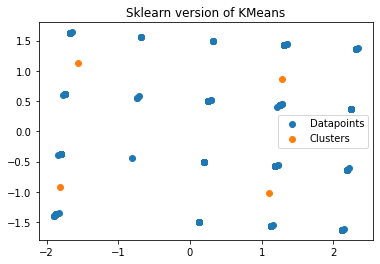

In [28]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [29]:
from kmeans_numpy_improved import *

In [30]:
km_numpy = KMeans_numpy(n_clusters=4, tolerance=0.00000000001)

In [31]:
clusters, clusterd_data = km_numpy.fit(reduced_data)
clusters = np.array(clusters)

In [32]:
cluster_one_data = np.array(clusterd_data[0])
cluster_two_data = np.array(clusterd_data[1])
cluster_three_data = np.array(clusterd_data[2])
cluster_four_data = np.array(clusterd_data[3])
# cluster_five_data = np.array(clusterd_data[4])

In [33]:
# print("Shape of the array = ",np.shape(cluster_four_data));

In [34]:
# print("Array Dimension = ",len(cluster_four_data.shape))

In [35]:
print("Array Dimension = ",len(cluster_three_data.shape))

Array Dimension =  2


In [36]:
full_data_kmeans = KMeans_numpy(n_clusters=4)
centroids, clus_data = full_data_kmeans.fit(df.values)

In [37]:
cluster_1 = pd.DataFrame(clus_data[0], columns=['Server Region','Rules Violation','Spending Score'])
cluster_2 = pd.DataFrame(clus_data[1], columns=['Server Region','Rules Violation','Spending Score'])
cluster_3 = pd.DataFrame(clus_data[2], columns=['Server Region','Rules Violation','Spending Score'])
cluster_4 = pd.DataFrame(clus_data[3], columns=['Server Region','Rules Violation','Spending Score'])
# cluster_5 = pd.DataFrame(clus_data[4], columns=['Server Region','Rules Violation','Spending Score'])

<h2>Region </h2>
0 = Asia-Pasific <br>
1 = Europe <br>
2 = North America <br>
3 = South America <br>
4 = Southeast Asia <br>
<h2>Rules Violation </h2><br>
0 = Cheating on Bygone Phantasm<br>
1 = Illegal resource obtaintment<br>
2 = Illegal resource obtainment & Cheating on Bygone Phantasm 90

<h2>Analisis Cluster 1

In [38]:
if ([cluster_1["Server Region"] == 0 | (cluster_1["Server Region"] == 1) | (cluster_1["Server Region"] == 2) | (cluster_1["Server Region"] == 3) | (cluster_1["Server Region"] == 4)]):
       cluster_1["Server Region"].replace(
       to_replace=[0,1,2,3,4], 
        value=['Asia-Pasific','Europe','North America','South America','Southeast Asia'],
       inplace=True)

In [39]:
#(df['col'] < -0.25) | (df['col'] > 0.25)

In [40]:
    #Replace to string values after get all the cluster
    cluster_1['Rules Violation'].replace(
    to_replace=[0,1,2], 
    value=['Cheating On Bygone Phantasm','Illegal Resource Obtaintment','Illegal Resource Obtaintment & Cheating on Bygone Phantasm 90'],
    inplace=True)

In [41]:
cluster_1

,Server Region,Rules Violation,Spending Score
0,Europe,Illegal Resource Obtaintment,1
1,Asia-Pasific,Illegal Resource Obtaintment,0
2,Asia-Pasific,Illegal Resource Obtaintment,0
3,North America,Illegal Resource Obtaintment,1
4,Europe,Illegal Resource Obtaintment,1
...,...,...,...
70,Europe,Illegal Resource Obtaintment,0
71,Europe,Illegal Resource Obtaintment,1
72,Asia-Pasific,Cheating On Bygone Phantasm,0
73,Asia-Pasific,Illegal Resource Obtaintment,1


<h2> Hasil dan Kesimpulan dari Cluster 1

In [42]:
print("Jumlah Penggunaan Kecurangan dan Spending Score pada masing2 akun yang dibanned pada Cluster 1")
cluster_1.groupby('Server Region')['Rules Violation'].value_counts()

Jumlah Penggunaan Kecurangan dan Spending Score pada masing2 akun yang dibanned pada Cluster 1


Server Region  Rules Violation                                              
Asia-Pasific   Illegal Resource Obtaintment                                     12
               Cheating On Bygone Phantasm                                       1
Europe         Illegal Resource Obtaintment                                     44
               Cheating On Bygone Phantasm                                       4
               Illegal Resource Obtaintment & Cheating on Bygone Phantasm 90     1
North America  Illegal Resource Obtaintment                                     11
               Cheating On Bygone Phantasm                                       2
Name: Rules Violation, dtype: int64

In [71]:
cluster_1.groupby('Server Region')['Rules Violation','Spending Score'].value_counts()

Server Region  Rules Violation                                                Spending Score
Asia-Pasific   Illegal Resource Obtaintment                                   1                  7
                                                                              0                  5
               Cheating On Bygone Phantasm                                    0                  1
Europe         Illegal Resource Obtaintment                                   1                 23
                                                                              0                 21
               Cheating On Bygone Phantasm                                    0                  2
                                                                              1                  2
               Illegal Resource Obtaintment & Cheating on Bygone Phantasm 90  1                  1
North America  Illegal Resource Obtaintment                                   1                  7
                

In [43]:
cluster_1.groupby('Server Region')['Spending Score'].value_counts()

Server Region  Spending Score
Asia-Pasific   1                  7
               0                  6
Europe         1                 26
               0                 23
North America  1                  9
               0                  4
Name: Spending Score, dtype: int64

In [44]:
cluster_1['Rules Violation'].value_counts().sum()

75

<h2> Analisis pada Cluster 2 </h2>

In [45]:
if ([cluster_2["Server Region"] == 0 | (cluster_2["Server Region"] == 1) | (cluster_2["Server Region"] == 2) | (cluster_2["Server Region"] == 3) | (cluster_2["Server Region"] == 4)]):
       cluster_2["Server Region"].replace(
       to_replace=[0,1,2,3,4], 
        value=['Asia-Pasific','Europe','North America','South America','Southeast Asia'],
       inplace=True)

In [46]:
 cluster_2['Rules Violation'].replace(
    to_replace=[0,1,2], 
    value=['Cheating On Bygone Phantasm','Illegal Resource Obtaintment','Illegal Resource Obtaintment & Cheating on Bygone Phantasm 90'],
    inplace=True)

In [47]:
cluster_2

,Server Region,Rules Violation,Spending Score
0,Southeast Asia,Illegal Resource Obtaintment & Cheating on Byg...,3
1,Southeast Asia,Illegal Resource Obtaintment,2
2,Southeast Asia,Illegal Resource Obtaintment,2
3,Southeast Asia,Illegal Resource Obtaintment,3
4,Southeast Asia,Illegal Resource Obtaintment,3
5,Southeast Asia,Illegal Resource Obtaintment,2
6,Southeast Asia,Illegal Resource Obtaintment & Cheating on Byg...,2
7,Southeast Asia,Illegal Resource Obtaintment,2
8,Southeast Asia,Illegal Resource Obtaintment,2
9,Southeast Asia,Illegal Resource Obtaintment,2


<h2> Hasil dan Kesimpulan dari Cluster 2

In [48]:
print("Jumlah Penggunaan Kecurangan dan Spending Score pada masing2 akun yang dibanned pada Cluster 2")
cluster_2.groupby('Server Region')['Rules Violation'].value_counts()

Jumlah Penggunaan Kecurangan dan Spending Score pada masing2 akun yang dibanned pada Cluster 2


Server Region   Rules Violation                                              
South America   Illegal Resource Obtaintment                                      1
Southeast Asia  Illegal Resource Obtaintment                                     47
                Illegal Resource Obtaintment & Cheating on Bygone Phantasm 90     4
                Cheating On Bygone Phantasm                                       1
Name: Rules Violation, dtype: int64

In [76]:
cluster_2.groupby('Server Region')['Rules Violation','Spending Score'].value_counts()

Server Region   Rules Violation                                                Spending Score
South America   Illegal Resource Obtaintment                                   2                  1
Southeast Asia  Illegal Resource Obtaintment                                   3                 25
                                                                               2                 22
                Illegal Resource Obtaintment & Cheating on Bygone Phantasm 90  3                  3
                Cheating On Bygone Phantasm                                    3                  1
                Illegal Resource Obtaintment & Cheating on Bygone Phantasm 90  2                  1
dtype: int64

In [49]:
cluster_2.groupby('Server Region')['Spending Score'].value_counts()

Server Region   Spending Score
South America   2                  1
Southeast Asia  3                 29
                2                 23
Name: Spending Score, dtype: int64

In [50]:
cluster_2['Rules Violation'].value_counts().sum()

53

<h2> Analisis Pada Cluster 3 </h2>

In [51]:
if ([cluster_3["Server Region"] == 0 | (cluster_3["Server Region"] == 1) | (cluster_3["Server Region"] == 2) | (cluster_3["Server Region"] == 3) | (cluster_3["Server Region"] == 4)]):
       cluster_3["Server Region"].replace(
       to_replace=[0,1,2,3,4], 
        value=['Asia-Pasific','Europe','North America','South America','Southeast Asia'],
       inplace=True)

In [52]:
 cluster_3['Rules Violation'].replace(
    to_replace=[0,1,2], 
    value=['Cheating On Bygone Phantasm','Illegal Resource Obtaintment','Illegal Resource Obtaintment & Cheating on Bygone Phantasm 90'],
    inplace=True)

In [53]:
cluster_3

,Server Region,Rules Violation,Spending Score
0,Asia-Pasific,Illegal Resource Obtaintment,3
1,Europe,Illegal Resource Obtaintment,3
2,North America,Illegal Resource Obtaintment,2
3,Europe,Illegal Resource Obtaintment,2
4,Europe,Illegal Resource Obtaintment,2
...,...,...,...
66,Europe,Illegal Resource Obtaintment,2
67,North America,Illegal Resource Obtaintment,2
68,Europe,Illegal Resource Obtaintment,2
69,Asia-Pasific,Illegal Resource Obtaintment,3


<h2> Hasil dan Kesimpulan dari Cluster 3

In [54]:
print("Jumlah Penggunaan Kecurangan dan Spending Score pada masing2 akun yang dibanned pada Cluster 3")
cluster_3.groupby('Server Region')['Rules Violation'].value_counts()

Jumlah Penggunaan Kecurangan dan Spending Score pada masing2 akun yang dibanned pada Cluster 3


Server Region  Rules Violation             
Asia-Pasific   Illegal Resource Obtaintment    16
               Cheating On Bygone Phantasm      2
Europe         Illegal Resource Obtaintment    28
               Cheating On Bygone Phantasm      3
North America  Illegal Resource Obtaintment    22
Name: Rules Violation, dtype: int64

In [74]:
cluster_3.groupby('Server Region')['Rules Violation','Spending Score'].value_counts()

Server Region  Rules Violation               Spending Score
Asia-Pasific   Illegal Resource Obtaintment  3                 10
                                             2                  6
               Cheating On Bygone Phantasm   2                  1
                                             3                  1
Europe         Illegal Resource Obtaintment  2                 14
                                             3                 14
               Cheating On Bygone Phantasm   2                  2
                                             3                  1
North America  Illegal Resource Obtaintment  2                 15
                                             3                  7
dtype: int64

In [55]:
cluster_3.groupby('Server Region')['Spending Score'].value_counts()

Server Region  Spending Score
Asia-Pasific   3                 11
               2                  7
Europe         2                 16
               3                 15
North America  2                 15
               3                  7
Name: Spending Score, dtype: int64

In [56]:
cluster_3['Rules Violation'].value_counts().sum()

71

<h2> Analisis Pada Cluster 4 </h2>

In [57]:
if ([cluster_4["Server Region"] == 0 | (cluster_4["Server Region"] == 1) | (cluster_4["Server Region"] == 2) | (cluster_4["Server Region"] == 3) | (cluster_4["Server Region"] == 4)]):
       cluster_4["Server Region"].replace(
       to_replace=[0,1,2,3,4], 
        value=['Asia-Pasific','Europe','North America','South America','Southeast Asia'],
       inplace=True)

In [58]:
 cluster_4['Rules Violation'].replace(
    to_replace=[0,1,2], 
    value=['Cheating On Bygone Phantasm','Illegal Resource Obtaintment','Illegal Resource Obtaintment & Cheating on Bygone Phantasm 90'],
    inplace=True)

In [59]:
cluster_4

,Server Region,Rules Violation,Spending Score
0,Southeast Asia,Illegal Resource Obtaintment,1
1,South America,Cheating On Bygone Phantasm,1
2,Southeast Asia,Illegal Resource Obtaintment,1
3,Southeast Asia,Illegal Resource Obtaintment,1
4,Southeast Asia,Illegal Resource Obtaintment,1
5,Southeast Asia,Illegal Resource Obtaintment,0
6,Southeast Asia,Illegal Resource Obtaintment,1
7,Southeast Asia,Illegal Resource Obtaintment,0
8,Southeast Asia,Illegal Resource Obtaintment,1
9,Southeast Asia,Illegal Resource Obtaintment,1


<h2> Hasil dan Kesimpulan dari Cluster 4

In [60]:
print("Jumlah Penggunaan Kecurangan dan Spending Score pada masing2 akun yang dibanned pada Cluster 4")
cluster_4.groupby('Server Region')['Rules Violation'].value_counts()

Jumlah Penggunaan Kecurangan dan Spending Score pada masing2 akun yang dibanned pada Cluster 4


Server Region   Rules Violation                                              
South America   Illegal Resource Obtaintment                                      6
                Cheating On Bygone Phantasm                                       1
Southeast Asia  Illegal Resource Obtaintment                                     41
                Cheating On Bygone Phantasm                                       1
                Illegal Resource Obtaintment & Cheating on Bygone Phantasm 90     1
Name: Rules Violation, dtype: int64

In [75]:
cluster_4.groupby('Server Region')['Rules Violation','Spending Score'].value_counts()

Server Region   Rules Violation                                                Spending Score
South America   Illegal Resource Obtaintment                                   0                  4
                                                                               1                  2
                Cheating On Bygone Phantasm                                    1                  1
Southeast Asia  Illegal Resource Obtaintment                                   0                 21
                                                                               1                 20
                Cheating On Bygone Phantasm                                    0                  1
                Illegal Resource Obtaintment & Cheating on Bygone Phantasm 90  1                  1
dtype: int64

In [61]:
cluster_4.groupby('Server Region')['Spending Score'].value_counts()

Server Region   Spending Score
South America   0                  4
                1                  3
Southeast Asia  0                 22
                1                 21
Name: Spending Score, dtype: int64

In [62]:
cluster_4['Rules Violation'].value_counts().sum()

50

<h2>Analisis Cluster 5

In [63]:
# if ([cluster_5["Server Region"] == 0 | (cluster_5["Server Region"] == 1) | (cluster_5["Server Region"] == 2) | (cluster_5["Server Region"] == 3) | (cluster_5["Server Region"] == 4)]):
#        cluster_5["Server Region"].replace(
#        to_replace=[0,1,2,3,4], 
#         value=['Asia-Pasific','Europe','North America','South America','Southeast Asia'],
#        inplace=True)

In [64]:
 # cluster_5['Rules Violation'].replace(
 #    to_replace=[0,1,2], 
 #    value=['Cheating On Bygone Phantasm','Illegal Resource Obtaintment','Illegal Resource Obtaintment & Cheating on Bygone Phantasm 90'],
 #    inplace=True)

In [65]:
# cluster_5

<h2> Hasil dan Kesimpulan dari Cluster 5

In [66]:
# print("Jumlah Penggunaan Kecurangan dan Spending Score pada masing2 akun yang dibanned pada Cluster 5")
# cluster_5.groupby('Server Region')['Rules Violation'].value_counts()

In [67]:
# print('Hasil Untuk Region Server Serta Jenis Pelanggaran Pada Cluster 5 :')
# cluster_5.groupby('Server Region')['Spending Score'].value_counts()

In [68]:
# cluster_5['Rules Violation'].value_counts().sum()

In [69]:
km.inertia_

134.66736194228494

In [70]:
# import pickle
# pickle.dump(km, open("model.pkl", "wb"))